In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # Data visualisation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

df = pd.read_csv('mudah-apartment-kl-selangor.csv')

df.head()

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur
3,100191767,Sentul Point Suite Apartment,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,97022692,Arte Mont Kiara,NaN,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur


In [3]:
df.shape

(19991, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19991 non-null  int64  
 1   prop_name              19043 non-null  object 
 2   completion_year        10806 non-null  float64
 3   monthly_rent           19989 non-null  object 
 4   location               19991 non-null  object 
 5   property_type          19991 non-null  object 
 6   rooms                  19985 non-null  object 
 7   parking                14289 non-null  float64
 8   bathroom               19985 non-null  float64
 9   size                   19991 non-null  object 
 10  furnished              19986 non-null  object 
 11  facilities             17782 non-null  object 
 12  additional_facilities  14043 non-null  object 
 13  region                 19991 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 2.1+

In [5]:
df.describe(include='all')

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
count,1.999100e+04,19043,10806.000000,19989,19991,19991,19985,14289.000000,19985.000000,19991,19986,17782,14043,19991
unique,NaN,2826,NaN,387,134,13,18,NaN,NaN,1215,3,10785,176,2
top,NaN,Majestic Maxim,NaN,RM 1 500 per month,Kuala Lumpur - Cheras,Condominium,3.0,NaN,NaN,850 sq.ft.,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Washing Machine",Selangor
freq,NaN,222,NaN,1401,1623,8448,6460,NaN,NaN,1443,8462,872,1927,10000
mean,9.970671e+07,NaN,2014.822321,NaN,NaN,NaN,NaN,1.416824,1.891719,NaN,NaN,NaN,NaN,NaN
std,3.482575e+06,NaN,6.735355,NaN,NaN,NaN,NaN,0.567368,0.556266,NaN,NaN,NaN,NaN,NaN
min,1.652551e+07,NaN,1977.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,9.984012e+07,NaN,2012.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN
50%,1.002127e+08,NaN,2017.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN
75%,1.006179e+08,NaN,2020.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN


**Data Wrangling**


In [6]:
df.isnull().sum()

ads_id                      0
prop_name                 948
completion_year          9185
monthly_rent                2
location                    0
property_type               0
rooms                       6
parking                  5702
bathroom                    6
size                        0
furnished                   5
facilities               2209
additional_facilities    5948
region                      0
dtype: int64

**How to replace missing value?**



*   Completion year: use median
*   Monthly rent: Remove whole row
*   Rooms: use median
*   Parking: NaN = 0 (No Parking)
*   Bathroom: use median
*   Furnished: NaN = 0 (Not Furnished)

In [7]:
df['completion_year'].value_counts()

completion_year
2021.0    1346
2020.0     997
2017.0     914
2018.0     820
2015.0     807
2019.0     768
2016.0     684
2014.0     560
2022.0     507
2013.0     461
2007.0     348
2010.0     334
2006.0     243
2008.0     216
2023.0     192
2005.0     182
2004.0     166
2009.0     163
2011.0     152
2012.0     131
2000.0     123
2001.0     105
1999.0      79
2003.0      74
1998.0      68
2002.0      61
1997.0      60
1996.0      46
1993.0      42
1995.0      30
2025.0      29
1994.0      18
1988.0      17
1990.0      16
1980.0      12
2024.0      10
1991.0       9
1985.0       6
1989.0       5
1987.0       3
1984.0       1
1977.0       1
Name: count, dtype: int64

In [8]:
df['completion_year'].fillna(df['completion_year'].median(), inplace=True)

df.isnull().sum()

ads_id                      0
prop_name                 948
completion_year             0
monthly_rent                2
location                    0
property_type               0
rooms                       6
parking                  5702
bathroom                    6
size                        0
furnished                   5
facilities               2209
additional_facilities    5948
region                      0
dtype: int64

In [9]:
df['completion_year'] = df['completion_year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19991 non-null  int64  
 1   prop_name              19043 non-null  object 
 2   completion_year        19991 non-null  int64  
 3   monthly_rent           19989 non-null  object 
 4   location               19991 non-null  object 
 5   property_type          19991 non-null  object 
 6   rooms                  19985 non-null  object 
 7   parking                14289 non-null  float64
 8   bathroom               19985 non-null  float64
 9   size                   19991 non-null  object 
 10  furnished              19986 non-null  object 
 11  facilities             17782 non-null  object 
 12  additional_facilities  14043 non-null  object 
 13  region                 19991 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 2.1+

In [10]:
df.dropna(subset=['monthly_rent'],inplace=True,axis=0)

df.isnull().sum()

ads_id                      0
prop_name                 947
completion_year             0
monthly_rent                0
location                    0
property_type               0
rooms                       6
parking                  5701
bathroom                    6
size                        0
furnished                   3
facilities               2209
additional_facilities    5946
region                      0
dtype: int64

In [11]:
df.shape

(19989, 14)

In [12]:
#drop RM in 'Monthly_rent'
df['monthly_rent'] = df['monthly_rent'].str.replace('RM', '').str.strip()
df['monthly_rent'].head()

0    4 200 per month
1    2 300 per month
2    1 000 per month
3    1 700 per month
4    1 299 per month
Name: monthly_rent, dtype: object

In [13]:
#drop per month in 'Monthly_rent'
df['monthly_rent'] = df['monthly_rent'].str.replace('per month', '').str.strip()
df['monthly_rent'].head()

0    4 200
1    2 300
2    1 000
3    1 700
4    1 299
Name: monthly_rent, dtype: object

In [14]:
#remove space in in 'Monthly_rent'
df['monthly_rent'] = df['monthly_rent'].str.replace(' ', '')
df['monthly_rent'].head()

0    4200
1    2300
2    1000
3    1700
4    1299
Name: monthly_rent, dtype: object

In [15]:
#convert data types of 'monthly_rent'

df['monthly_rent'] = df['monthly_rent'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19989 entries, 0 to 19990
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19989 non-null  int64  
 1   prop_name              19042 non-null  object 
 2   completion_year        19989 non-null  int64  
 3   monthly_rent           19989 non-null  int64  
 4   location               19989 non-null  object 
 5   property_type          19989 non-null  object 
 6   rooms                  19983 non-null  object 
 7   parking                14288 non-null  float64
 8   bathroom               19983 non-null  float64
 9   size                   19989 non-null  object 
 10  furnished              19986 non-null  object 
 11  facilities             17780 non-null  object 
 12  additional_facilities  14043 non-null  object 
 13  region                 19989 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 2.3+ MB


In [16]:
df['monthly_rent'].describe()

count    1.998900e+04
mean     2.269084e+03
std      2.241285e+04
min      7.000000e+01
25%      1.100000e+03
50%      1.400000e+03
75%      1.800000e+03
max      2.400000e+06
Name: monthly_rent, dtype: float64

In [17]:
df['monthly_rent'].value_counts().sort_index()

monthly_rent
70         1
80         2
85         1
90         1
100        8
          ..
480000     1
550000     1
580000     3
780000     1
2400000    1
Name: count, Length: 387, dtype: int64

In [18]:
# remove anything more than 15000 because based on research maximum rental price in KL is RM15000
# remove value less than 200
df.drop(df[df["monthly_rent"] > 15000].index, inplace=True)
df.drop(df[df["monthly_rent"] < 200].index, inplace=True)

df.shape

(19914, 14)

In [19]:
df['size'] = df['size'].str.replace('sq.ft.', '').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19914 entries, 0 to 19990
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19914 non-null  int64  
 1   prop_name              18978 non-null  object 
 2   completion_year        19914 non-null  int64  
 3   monthly_rent           19914 non-null  int64  
 4   location               19914 non-null  object 
 5   property_type          19914 non-null  object 
 6   rooms                  19912 non-null  object 
 7   parking                14238 non-null  float64
 8   bathroom               19912 non-null  float64
 9   size                   19914 non-null  int64  
 10  furnished              19913 non-null  object 
 11  facilities             17713 non-null  object 
 12  additional_facilities  14015 non-null  object 
 13  region                 19914 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 2.3+ MB


In [20]:
# How many nulls value of rooms
display(df.loc[df['rooms'].isnull()])
print(df['rooms'].unique())

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
12875,100781360,NaN,2017,650,Selangor - 43,Houses,NaN,1.0,NaN,300,Fully Furnished,NaN,"Air-Cond, Cooking Allowed, Washing Machine, In...",Selangor
16812,100633464,NaN,2017,600,Selangor - Kajang,Others,NaN,NaN,NaN,750,NaN,Parking,Near KTM/LRT,Selangor


['5' '3' '2' '1' '4' '7' '6' 'More than 10' '9' '3.0' '4.0' '2.0' '1.0'
 '5.0' '9.0' '6.0' nan '7.0' '10.0']


In [21]:
# price range from 600 to 650 in KL and Selangor is price for 1 room
df['rooms'].fillna('1',inplace = True)

# 'Convert more than 10' to 11
df['rooms'].replace('More than 10', '11', inplace=True)

# Convert the objects into integers
df['rooms'] = df['rooms'].astype(float).astype(int)

df['rooms'].value_counts()

rooms
3     12750
2      3287
1      2372
4      1378
5        92
6        23
7         7
11        2
9         2
10        1
Name: count, dtype: int64

In [22]:
df.isnull().sum()

ads_id                      0
prop_name                 936
completion_year             0
monthly_rent                0
location                    0
property_type               0
rooms                       0
parking                  5676
bathroom                    2
size                        0
furnished                   1
facilities               2201
additional_facilities    5899
region                      0
dtype: int64

In [23]:
df['parking'].value_counts()

parking
1.0     8616
2.0     5410
3.0      177
4.0       22
5.0        6
10.0       4
9.0        1
6.0        1
7.0        1
Name: count, dtype: int64

In [24]:
df['parking'].fillna(0, inplace=True)
df.isnull().sum()

ads_id                      0
prop_name                 936
completion_year             0
monthly_rent                0
location                    0
property_type               0
rooms                       0
parking                     0
bathroom                    2
size                        0
furnished                   1
facilities               2201
additional_facilities    5899
region                      0
dtype: int64

In [25]:
df['bathroom'].fillna(df['bathroom'].median(), inplace=True)
df['bathroom'].value_counts()

bathroom
2.0    14860
1.0     3769
3.0     1061
4.0      155
5.0       52
6.0        8
7.0        6
8.0        3
Name: count, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19914 entries, 0 to 19990
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19914 non-null  int64  
 1   prop_name              18978 non-null  object 
 2   completion_year        19914 non-null  int64  
 3   monthly_rent           19914 non-null  int64  
 4   location               19914 non-null  object 
 5   property_type          19914 non-null  object 
 6   rooms                  19914 non-null  int64  
 7   parking                19914 non-null  float64
 8   bathroom               19914 non-null  float64
 9   size                   19914 non-null  int64  
 10  furnished              19913 non-null  object 
 11  facilities             17713 non-null  object 
 12  additional_facilities  14015 non-null  object 
 13  region                 19914 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 2.3+ MB


In [27]:
df['parking'] = df['parking'].astype(int)
df['bathroom'] = df['bathroom'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19914 entries, 0 to 19990
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ads_id                 19914 non-null  int64 
 1   prop_name              18978 non-null  object
 2   completion_year        19914 non-null  int64 
 3   monthly_rent           19914 non-null  int64 
 4   location               19914 non-null  object
 5   property_type          19914 non-null  object
 6   rooms                  19914 non-null  int64 
 7   parking                19914 non-null  int64 
 8   bathroom               19914 non-null  int64 
 9   size                   19914 non-null  int64 
 10  furnished              19913 non-null  object
 11  facilities             17713 non-null  object
 12  additional_facilities  14015 non-null  object
 13  region                 19914 non-null  object
dtypes: int64(7), object(7)
memory usage: 2.3+ MB


In [28]:
df.isnull().sum()

ads_id                      0
prop_name                 936
completion_year             0
monthly_rent                0
location                    0
property_type               0
rooms                       0
parking                     0
bathroom                    0
size                        0
furnished                   1
facilities               2201
additional_facilities    5899
region                      0
dtype: int64

In [29]:
# Let see mean of each category of furnished
df.groupby('furnished')['monthly_rent'].mean()

furnished
Fully Furnished        2015.980920
Not Furnished          1034.280802
Partially Furnished    1422.049718
Name: monthly_rent, dtype: float64

In [30]:
# Use label encoding
df['furnished'] = df['furnished'].replace('Fully Furnished', '2')
df['furnished'] = df['furnished'].replace('Partially Furnished', '1')
df['furnished'] = df['furnished'].replace('Not Furnished', '0')
df['furnished'].value_counts()

furnished
2    8438
1    7985
0    3490
Name: count, dtype: int64

In [31]:
df.loc[df['furnished'].isnull()]

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
16812,100633464,NaN,2017,600,Selangor - Kajang,Others,1,0,2,750,NaN,Parking,Near KTM/LRT,Selangor


In [32]:
# Given its rent is RM600, most likely its not furnished
df['furnished'].fillna(0,inplace=True)

In [33]:
df['furnished'] = df['furnished'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19914 entries, 0 to 19990
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ads_id                 19914 non-null  int64 
 1   prop_name              18978 non-null  object
 2   completion_year        19914 non-null  int64 
 3   monthly_rent           19914 non-null  int64 
 4   location               19914 non-null  object
 5   property_type          19914 non-null  object
 6   rooms                  19914 non-null  int64 
 7   parking                19914 non-null  int64 
 8   bathroom               19914 non-null  int64 
 9   size                   19914 non-null  int64 
 10  furnished              19914 non-null  int64 
 11  facilities             17713 non-null  object
 12  additional_facilities  14015 non-null  object
 13  region                 19914 non-null  object
dtypes: int64(8), object(6)
memory usage: 2.3+ MB


In [34]:
df['facilities'].fillna('x',inplace=True)
my_dict = {}
def count_facilities(x):
    global my_dict
    if isinstance(x, float):
        if x not in my_dict:
            my_dict[x] = 1

        else:
            my_dict[x] += 1
    else:
        list = x.split(', ')
        for j in list:
            if j not in my_dict:
                my_dict[j] = 1
            else:
                my_dict[j] += 1
        pass

df['facilities'].apply(lambda x: count_facilities(x))
df['additional_facilities'].apply(lambda x: count_facilities(x))
my_dict

{'Minimart': 10233,
 'Gymnasium': 12389,
 'Security': 16224,
 'Playground': 15111,
 'Swimming Pool': 14047,
 'Parking': 16022,
 'Lift': 11611,
 'Barbeque area': 8707,
 'Multipurpose hall': 8259,
 'Jogging Track': 8391,
 'Sauna': 6533,
 'Squash Court': 4044,
 'Club house': 3626,
 'Tennis Court': 4097,
 'x': 2201,
 '10': 51,
 '11': 64,
 '6': 1,
 'Air-Cond': 10779,
 'Cooking Allowed': 12819,
 'Washing Machine': 7498,
 'Near KTM/LRT': 7500,
 nan: 5899,
 'Internet': 2499,
 '': 1}

In [35]:
# Using facilities might lead to overfitting so i will drop facilities
# drop ads_id and prop_name

df.drop('facilities', axis=1, inplace=True)
df.drop('additional_facilities', axis=1, inplace=True)
df.drop('ads_id', axis=1, inplace=True)
df.drop('prop_name', axis=1, inplace=True)

df.head()

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region
0,2022,4200,Kuala Lumpur - Taman Desa,Condominium,5,2,6,1842,2,Kuala Lumpur
1,2017,2300,Kuala Lumpur - Cheras,Condominium,3,1,2,1170,1,Kuala Lumpur
2,2017,1000,Kuala Lumpur - Taman Desa,Apartment,3,0,2,650,2,Kuala Lumpur
3,2020,1700,Kuala Lumpur - Sentul,Apartment,2,1,2,743,1,Kuala Lumpur
4,2017,1299,Kuala Lumpur - Mont Kiara,Service Residence,1,1,1,494,0,Kuala Lumpur


In [36]:
# Check relationship
df.groupby(['region'])['monthly_rent'].mean()

region
Kuala Lumpur    1857.943590
Selangor        1354.088173
Name: monthly_rent, dtype: float64

In [37]:
# Selangor = 0
# KL = 1 (More expensive ma, got linear relationship)

df['region'] = df['region'].replace('Kuala Lumpur', '1')
df['region'] = df['region'].replace('Selangor', '0')

df.head()

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region
0,2022,4200,Kuala Lumpur - Taman Desa,Condominium,5,2,6,1842,2,1
1,2017,2300,Kuala Lumpur - Cheras,Condominium,3,1,2,1170,1,1
2,2017,1000,Kuala Lumpur - Taman Desa,Apartment,3,0,2,650,2,1
3,2020,1700,Kuala Lumpur - Sentul,Apartment,2,1,2,743,1,1
4,2017,1299,Kuala Lumpur - Mont Kiara,Service Residence,1,1,1,494,0,1


<ipython-input-38-68b688a17078>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='monthly_rent', data=df, palette='magma')


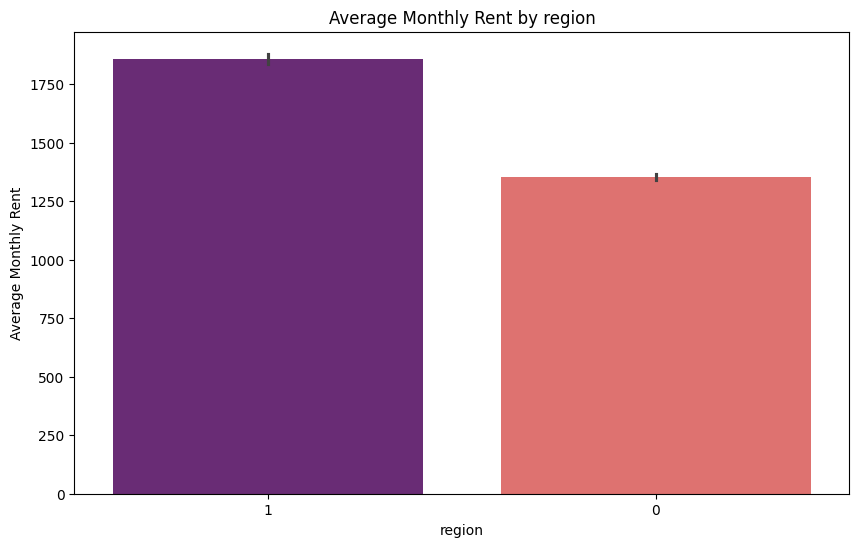

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='monthly_rent', data=df, palette='magma')
plt.xlabel('region')
plt.ylabel('Average Monthly Rent')
plt.title('Average Monthly Rent by region')
plt.show()

In [39]:
df['region'] = df['region'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19914 entries, 0 to 19990
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   completion_year  19914 non-null  int64 
 1   monthly_rent     19914 non-null  int64 
 2   location         19914 non-null  object
 3   property_type    19914 non-null  object
 4   rooms            19914 non-null  int64 
 5   parking          19914 non-null  int64 
 6   bathroom         19914 non-null  int64 
 7   size             19914 non-null  int64 
 8   furnished        19914 non-null  int64 
 9   region           19914 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 1.7+ MB


In [40]:
#List top location
top_locations = df['location'].value_counts().head(10)
top_locations

location
Kuala Lumpur - Cheras        1622
Selangor - Kajang            1021
Selangor - Shah Alam          968
Kuala Lumpur - Setapak        965
Selangor - Cyberjaya          879
Kuala Lumpur - Sentul         773
Selangor - Puchong            746
Selangor - Seri Kembangan     704
Kuala Lumpur - Kepong         663
Selangor - Petaling Jaya      609
Name: count, dtype: int64

In [41]:
df['location'].describe(include='all')

count                     19914
unique                      132
top       Kuala Lumpur - Cheras
freq                       1622
Name: location, dtype: object

In [42]:
# theres 132 unique values, i dont think hot encode is a good idea
# So lets use average monthly rent of each location

location_target_mean = df.groupby(['location'])['monthly_rent'].mean()
df['location'] = round(df['location'].map(location_target_mean),2)
df.head()

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region
0,2022,4200,1622.96,Condominium,5,2,6,1842,2,1
1,2017,2300,1587.85,Condominium,3,1,2,1170,1,1
2,2017,1000,1622.96,Apartment,3,0,2,650,2,1
3,2020,1700,1675.39,Apartment,2,1,2,743,1,1
4,2017,1299,3521.44,Service Residence,1,1,1,494,0,1


In [43]:
location_target_mean.head(132)

location
Kuala Lumpur - Ampang                  1930.109422
Kuala Lumpur - Ampang Hilir            2961.837209
Kuala Lumpur - Bandar Damai Perdana    1572.222222
Kuala Lumpur - Bandar Menjalara        1594.288889
Kuala Lumpur - Bandar Tasik Selatan     961.538462
                                          ...     
Selangor - Subang Jaya                 1654.332031
Selangor - Sungai Buloh                1315.600000
Selangor - Telok Panglima Garang       1800.000000
Selangor - USJ                         1329.275862
Selangor - Ulu Klang                   2238.888889
Name: monthly_rent, Length: 132, dtype: float64

In [44]:
df['location'].value_counts()

location
1587.85    1622
1113.92    1021
1440.16     968
1599.35     965
1398.25     879
           ... 
1200.00       2
1850.00       2
720.00        1
899.00        1
1800.00       1
Name: count, Length: 127, dtype: int64

In [45]:
# In this dataset, we found 9 property types
# So we will use average monthly rent of each type

type_mean = df.groupby('property_type')['monthly_rent'].mean()
df['property_type'] = round(df['property_type'].map(type_mean),2)
df.head()

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region
0,2022,4200,1622.96,1795.38,5,2,6,1842,2,1
1,2017,2300,1587.85,1795.38,3,1,2,1170,1,1
2,2017,1000,1622.96,1137.15,3,0,2,650,2,1
3,2020,1700,1675.39,1137.15,2,1,2,743,1,1
4,2017,1299,3521.44,1860.51,1,1,1,494,0,1


In [46]:
type_mean.head(9)

property_type
Apartment            1137.149838
Condominium          1795.377273
Duplex               1912.171053
Flat                  812.171577
Houses                650.000000
Others               1420.795455
Service Residence    1860.509252
Studio               1252.555556
Townhouse Condo      2414.257143
Name: monthly_rent, dtype: float64

In [47]:
df['property_type'].value_counts()

property_type
1795.38    8413
1860.51    5296
1137.15    5239
812.17      577
1252.56     189
1420.80      88
1912.17      76
2414.26      35
650.00        1
Name: count, dtype: int64

In [48]:
df.to_csv('rental_pred.csv')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19914 entries, 0 to 19990
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   completion_year  19914 non-null  int64  
 1   monthly_rent     19914 non-null  int64  
 2   location         19914 non-null  float64
 3   property_type    19914 non-null  float64
 4   rooms            19914 non-null  int64  
 5   parking          19914 non-null  int64  
 6   bathroom         19914 non-null  int64  
 7   size             19914 non-null  int64  
 8   furnished        19914 non-null  int64  
 9   region           19914 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.7 MB


**EDA**

In [50]:
df.corr()

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region
completion_year,1.000000,0.008010,-0.099695,-0.015168,-0.038400,0.076013,-0.050919,-0.115473,-0.047218,-0.009798
monthly_rent,0.008010,1.000000,0.553778,0.375252,0.145757,0.217727,0.397925,0.364169,0.420397,0.283297
location,-0.099695,0.553778,1.000000,0.183539,-0.064550,-0.029188,0.093022,0.122317,0.268079,0.511570
property_type,-0.015168,0.375252,0.183539,1.000000,-0.129016,0.238983,0.066819,0.125489,0.388545,0.116198
rooms,-0.038400,0.145757,-0.064550,-0.129016,1.000000,0.201253,0.678657,0.405785,-0.183545,0.095780
parking,0.076013,0.217727,-0.029188,0.238983,0.201253,1.000000,0.262587,0.199758,0.096635,-0.023718
bathroom,-0.050919,0.397925,0.093022,0.066819,0.678657,0.262587,1.000000,0.479329,-0.018852,0.110371
size,-0.115473,0.364169,0.122317,0.125489,0.405785,0.199758,0.479329,1.000000,0.058776,0.101822
furnished,-0.047218,0.420397,0.268079,0.388545,-0.183545,0.096635,-0.018852,0.058776,1.000000,0.116115
region,-0.009798,0.283297,0.511570,0.116198,0.095780,-0.023718,0.110371,0.101822,0.116115,1.000000


<Axes: >

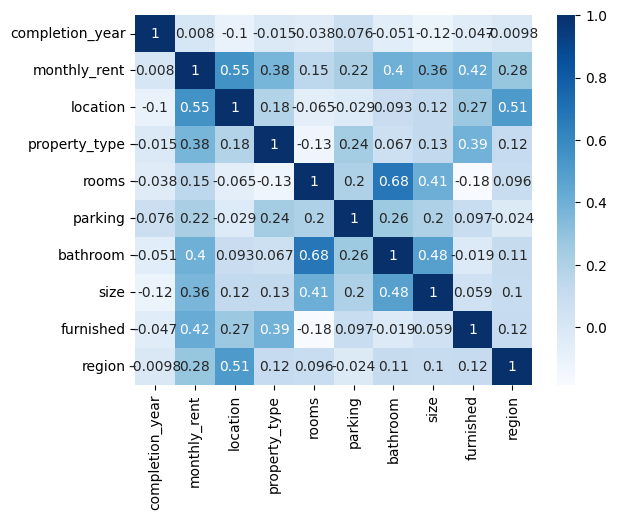

In [51]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

Text(0.5, 1.0, 'Average Monthly Rent by location')

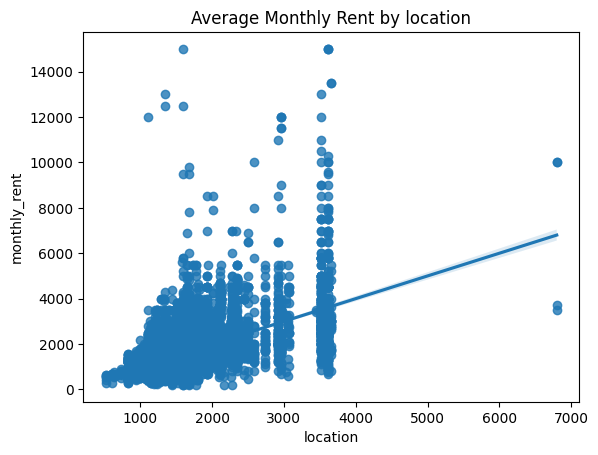

In [52]:
sns.regplot(x='location', y='monthly_rent', data=df)
plt.title('Average Monthly Rent by location')

Text(0.5, 1.0, 'Average Monthly Rent by property_type')

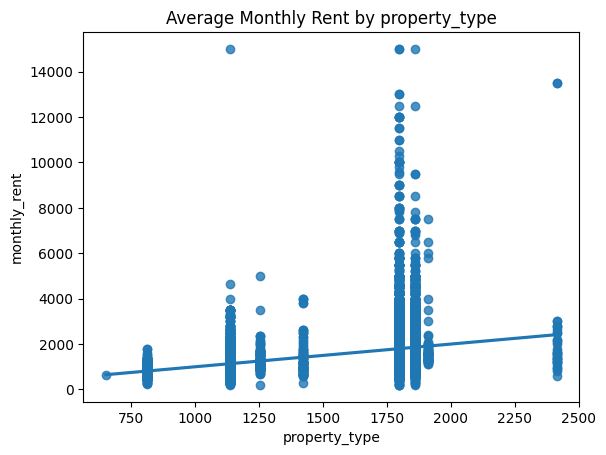

In [53]:
sns.regplot(x='property_type', y='monthly_rent', data=df)
plt.title('Average Monthly Rent by property_type')

<ipython-input-54-c539b7b09247>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='furnished', y='monthly_rent', data=df, palette='magma')


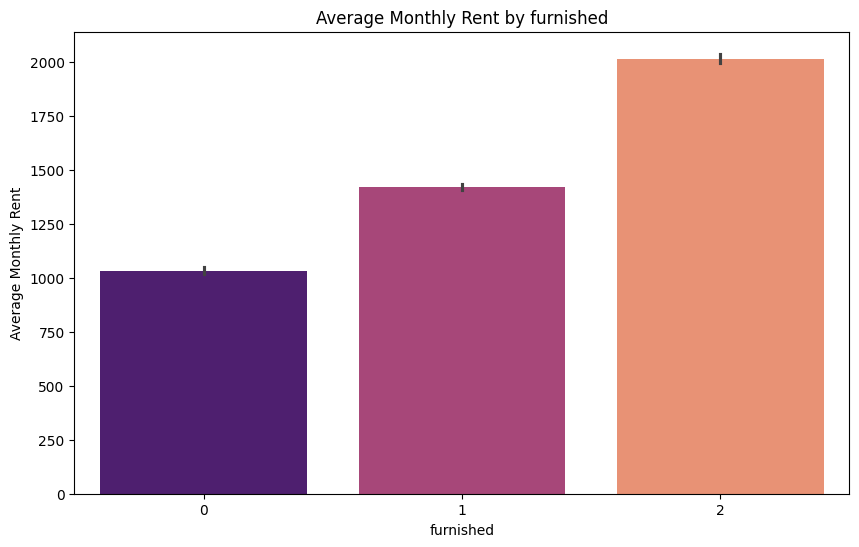

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x='furnished', y='monthly_rent', data=df, palette='magma')
plt.xlabel('furnished')
plt.ylabel('Average Monthly Rent')
plt.title('Average Monthly Rent by furnished')
plt.show()

#**Modelling**
Splitting the datasets into Training, Cross Validation, Test set

## 1. XGBoost Regression

In [55]:
# Splitting the datasets into Training, Cross Validation and Test set
X = df.drop("monthly_rent", axis=1).values
y = df['monthly_rent'].values

# Data Normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [56]:
# Split data into 30% etc and 70% train
X_train_fit,x_,y_train_fit,y_ = train_test_split(X, y, test_size=0.3, random_state=42)

# From etc, we split into 50% cv and 50% test
X_cv,X_test,y_cv,y_test = train_test_split(x_,y_,test_size=0.5,random_state=42)

del x_,y_
print(f"the shape of the training set (input) is: {X_train_fit.shape}")
print(f"the shape of the training set (target) is: {y_train_fit.shape}\n")
print(f"the shape of the cross validation set (input) is: {X_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {X_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (13939, 9)
the shape of the training set (target) is: (13939,)

the shape of the cross validation set (input) is: (2987, 9)
the shape of the cross validation set (target) is: (2987,)

the shape of the test set (input) is: (2988, 9)
the shape of the test set (target) is: (2988,)


In [69]:
# We use XGBoostRegressor
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
model = GradientBoostingRegressor(**params)
model.fit(X_train_fit, y_train_fit)

print(f"R^2 Score CV Set:{model.score(X_cv, y_cv):.2f}")
print(f"R^2 Score Test Set:{model.score(X_test, y_test):.2f}")

R^2 Score CV Set:0.72
R^2 Score Test Set:0.70


In [58]:
#Cross Validation Dataset

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_jobs=-1, early_stopping_rounds=5,eval_metric="rmse")

# Train the model
xgb_model.fit(X_train_fit, y_train_fit, eval_set=[(X_cv, y_cv)], verbose=False)

# Evaluate the model
y_pred = xgb_model.predict(X_cv)
mse = mean_squared_error(y_cv, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_cv, y_pred)
r2 = r2_score(y_cv, y_pred)

print(f"RMSE Score: {rmse:.2f}")
print(f"MAE Score: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

RMSE Score: 485.09
MAE Score: 257.21
R^2 Score: 0.72


In [59]:
#Test Dataset

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_jobs=-1, early_stopping_rounds=5,eval_metric="rmse")

# Train the model
xgb_model.fit(X_train_fit, y_train_fit, eval_set=[(X_test, y_test)], verbose=False)

# Evaluate the model
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE Score: {rmse:.2f}")
print(f"MAE Score: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

RMSE Score: 438.97
MAE Score: 231.91
R^2 Score: 0.76


## 2. Random Forest Regression

In [60]:
from sklearn.ensemble import RandomForestRegressor


params = {"n_estimators": [100, 200, 300, 500 ],
          "max_features": ["sqrt", "log2"]}

# Gridsearch
rf_tree = RandomForestRegressor(criterion = "squared_error",
                                random_state = 42)

rf_tree_grid = GridSearchCV(estimator = rf_tree,
                          param_grid = params,
                          cv = 5,
                          scoring = "neg_mean_absolute_error")

# We splitting into just training and test this time because gridsearch performs cross validation
X_train_fit,X_test,y_train_fit,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
# Fit grid search cv
rf_tree_grid.fit(X_train_fit, y_train_fit)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='neg_mean_absolute_error')

In [62]:
rf_tree_grid.best_params_

{'max_features': 'sqrt', 'n_estimators': 500}

In [63]:
rf_tree = RandomForestRegressor(criterion = "squared_error",
                                max_features = "sqrt",
                                n_estimators = 500,
                                random_state = 42)

rf_tree.fit(X_train_fit, y_train_fit)

RandomForestRegressor(max_features='sqrt', n_estimators=500, random_state=42)

In [64]:
# Cross Validation Dataset

y_hat = rf_tree.predict(X_cv)

mse = mean_squared_error(y_cv, y_hat)
rmse = np.sqrt(mse)
print(f'RMSE ]Score: {rmse:.2f}')

mae = mean_absolute_error(y_cv, y_hat)
print(f'MAE Score: {mae:.2f}')

r2_score = rf_tree.score(X_cv, y_cv)
print(f'R^2 Score: {r2_score:.2f}')

RMSE ]Score: 392.40
MAE Score: 165.69
R^2 Score: 0.81


In [65]:
# Test Dataset

y_hat = rf_tree.predict(X_test)

mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
print(f'RMSE Score: {rmse:.2f}')

mae = mean_absolute_error(y_test, y_hat)
print(f'MAE Score: {mae:.2f}')

r2_score = rf_tree.score(X_test, y_test)
print(f'R^2 Score: {r2_score:.2f}')

RMSE Score: 446.66
MAE Score: 197.87
R^2 Score: 0.76


In [66]:
!pip install gradio
!pip install gradio==4.29.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

In [70]:
import gradio as gr

def predict_rent_price(location, property_type, size, rooms, bathroom, parking, furnished, completion_year, region):
    # categorical features to numerical values
    location_mapping = {'Kuala Lumpur - Cheras': 1587.85, 'Selangor - Kajang': 1113.92, 'Selangor - Shah Alam': 1440.16, 'Kuala Lumpur - Setapak': 1599.35, 'Selangor - Cyberjaya': 1398.25}
    property_type_mapping = {'Condominium': 1795.38, 'Service Residence': 1860.51, 'Apartment': 1137.15, 'Flat': 812.17, 'Studio': 1252.56}
    furnished_mapping = {'Not Furnished': 0, 'Partially Furnished': 1, 'Fully Furnished': 2}

    # Handle potential missing or invalid values
    location = location_mapping.get(location, 0)
    property_type = property_type_mapping.get(property_type, 0)
    furnished = furnished_mapping.get(furnished, 0)

    # Prepare input data for prediction
    input_data = pd.DataFrame({
        'location': [location],
        'property_type': [property_type],
        'size': [size],
        'rooms': [rooms],
        'bathroom': [bathroom],
        'parking': [parking],
        'furnished': [furnished],
        'completion_year': [completion_year],
        'region': [region]
    })

    # Make prediction
    predicted_price = rf_tree.predict(input_data)[0]
    return f"Predicted rent price: RM{predicted_price:.2f}"

location_options = ['Kuala Lumpur - Cheras', 'Selangor - Kajang', 'Selangor - Shah Alam', 'Kuala Lumpur - Setapak', 'Selangor - Cyberjaya']
property_type_options = ['Condominium', 'Service Residence', 'Apartment', 'Flat', 'Studio']
furnished_options = ['Not Furnished', 'Partially Furnished', 'Fully Furnished']

iface = gr.Interface(
    fn=predict_rent_price,
    inputs=[
        gr.Dropdown(choices=location_options, label="Select Location"),
        gr.Dropdown(choices=property_type_options, label="Property Type"),
        gr.Slider(minimum=0, maximum=5000, step=10, value=1000, label="Size (Sq.Ft.)"),
        gr.Slider(minimum=1, maximum=10, step=1, value=3, label="Rooms"),
        gr.Slider(minimum=1, maximum=5, step=1, value=2, label="Bathroom"),
        gr.Slider(minimum=0, maximum=5, step=1, value=1, label="Parking"),
        gr.Dropdown(choices=furnished_options, label="Furnished"),
        gr.Slider(minimum=1990, maximum=2023, step=1, value=2010, label="Completion Year"),
        gr.Dropdown(choices=[0, 1], value=0, label="Region (0: Selangor, 1: KL)"),
    ],
    outputs="text"
)

# Create the Gradio interface
output = gr.Textbox(label="Predicted Rent Price")
gr_interface = gr.Interface(
    fn=predict_rent_price,  # Use the correct function name
    inputs=[
        gr.Dropdown(choices=location_options, label="Select Location"),
        gr.Dropdown(choices=property_type_options, label="Property Type"),
        gr.Slider(minimum=0, maximum=5000, step=10, value=1000, label="Size (Sq.Ft.)"),
        gr.Slider(minimum=1, maximum=10, step=1, value=3, label="Rooms"),
        gr.Slider(minimum=1, maximum=5, step=1, value=2, label="Bathroom"),
        gr.Slider(minimum=0, maximum=5, step=1, value=1, label="Parking"),
        gr.Dropdown(choices=furnished_options, label="Furnished"),
        gr.Slider(minimum=1990, maximum=2023, step=1, value=2010, label="Completion Year"),
        gr.Dropdown(choices=[0, 1], value=0, label="Region (0: Selangor, 1: KL)"),
    ],
    outputs=output,
    title="Rent Price Prediction",
    description="Predict the demand for house rent in Klang Valley."
)

gr_interface.launch()  # Launch the corrected interface


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://4654c8b604c38854e3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
